In [1]:
%reset -f

In [2]:
from ultralytics import YOLO
from PIL import Image
import cv2
from fenceBuilder import checkInside, fenceBuild, drawFence
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

In [3]:
model = YOLO("yolo11m.pt")

In [4]:
# img_path = "Images\\exported frames\\day_frame_960.jpg"
img_path = "D:\\Documents\\NU\\sem_6\\NU 302 R&D Project\\Fencing Results\\Data\\Near\\i19.jpg"
image = cv2.imread(img_path)

In [5]:
fenceBuild(image)

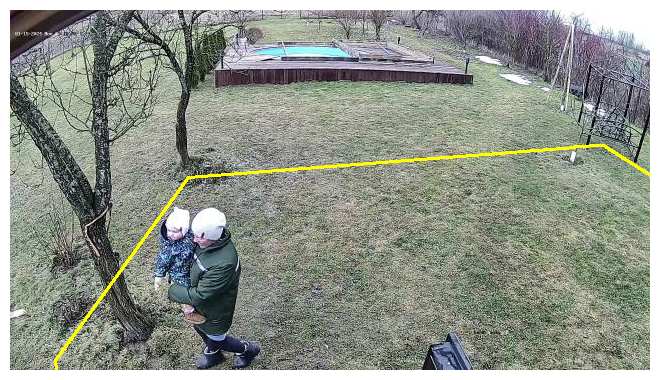

In [6]:
# draw fence over the frame
drawFence(image)
dpi = matplotlib.rcParams['figure.dpi']
height, width, depth = image.shape

figsize = width / float(dpi), height / float(dpi)

fig = plt.figure(figsize=figsize)
fig.add_axes([0, 0, 1, 1])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [7]:
results = model(image, conf=0.5, classes=[0], iou=0.7)
boxes = results[0].boxes.xyxy.tolist()  # get the bounding box co-ords
outcome = False
for box in boxes:

    # calculating the feet of the bounding boxes
    x_min, y_min, x_max, y_max = box
    center_x = int((x_min + x_max) / 2)
    center_y = int(y_max)
    # center_y = int((2 * y_min * y_max )/ (y_min + y_max) 

    # visualize the center of bounding box
    cv2.circle(image, (center_x, center_y), 2, (0,255,0), 5)
    if outcome == False:

        # checking whether centroid is inside of fence
        outcome = checkInside(center_x, center_y)

if outcome:
    color = (0, 0, 255)
    cv2.putText(image, 'BREACH', (300, 300), cv2.FONT_HERSHEY_SIMPLEX , 2, (0,0,255), 2, cv2.LINE_AA)
else:
    color = (0, 255, 0)
    cv2.putText(image, 'NO BREACH', (300, 300), cv2.FONT_HERSHEY_SIMPLEX , 2, (0,255,0), 2, cv2.LINE_AA)
# Visualize the results on the frame
annotated_frame = results[0].plot()

# Display the annotated frame
dpi = matplotlib.rcParams['figure.dpi']
height, width, depth = image.shape

figsize = width / float(dpi), height / float(dpi)

fig = plt.figure(figsize=figsize)
fig.add_axes([0, 0, 1, 1])
plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


0: 384x640 1 person, 59.7ms
Speed: 2.0ms preprocess, 59.7ms inference, 124.3ms postprocess per image at shape (1, 3, 384, 640)


TypeError: checkInside() missing 3 required positional arguments: 'fence', 'track_id', and 'past_coordinates'